<a href="https://colab.research.google.com/github/LinetN/Insurance-Heart1/blob/master/Assignment_Seven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**You have been provided with 2 csv data files, ‘heart’ and ‘insurance’. They shall both be used interdorm for analysis.**

**1. Import the 2 data sets, ‘insurance’ and ‘heart’.**

In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [79]:
dfheart=pd.read_csv("/content/drive/MyDrive/ADS/Assignment 7/heart.csv")

In [80]:
dfinsurance=pd.read_csv("/content/drive/MyDrive/ADS/Assignment 7/insurance.csv")

In [81]:
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
dfinsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**2. For the ‘heart’ data frame, rename the column ‘target’ to’ heart disease’.**

In [83]:
heart = dfheart.rename(columns={'target':'heart disease'})

In [84]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**3. In the ‘insurance’ data frame, map encode the gender categories in the following procedure:**
**a. Female – 0**
**b. Male - 1** 

In [85]:
sex_to_num={"female":0,"male":1}
dfinsurance['sex'] = dfinsurance['sex'].map(sex_to_num)

In [86]:
dfinsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [87]:
dfinsurance.sex.unique()

array([0, 1])

**4. Explore each data frame using at least 2 data exploratory tools of your choosing in pandas and interpret your observation in a markdown cell.**

In [88]:
heart.isnull().sum()

age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
heart disease    0
dtype: int64

In [89]:
dfinsurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Observation**
There are no missing values in each dataset

In [90]:
heart.shape

(303, 14)

In [91]:
dfinsurance.shape

(1338, 7)

**Observation**
The heart dataset has 303 row and 14 collumns while the insurance dataset has 1338 rows and 7 collumns

**5. Assume the 2 data frames where taken from the same hospital. As a result, a few of the individuals who went through a heart check-up had insurance coverage. Utilize the 2 common columns to combine the 2 data frames to a singular data frame called df_all.**

In [93]:
df_all= pd.concat([dfinsurance, heart],ignore_index=True)

df_all=df_all.drop_duplicates()

In [94]:
df_all

,age,sex,bmi,children,smoker,region,charges,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,19,0,27.900,0.0,yes,southwest,16884.92400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,1,33.770,1.0,no,southeast,1725.55230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28,1,33.000,3.0,no,southeast,4449.46200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33,1,22.705,0.0,no,northwest,21984.47061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,1,28.880,0.0,no,northwest,3866.85520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,57,0,NaN,NaN,NaN,NaN,NaN,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
1637,45,1,NaN,NaN,NaN,NaN,NaN,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
1638,68,1,NaN,NaN,NaN,NaN,NaN,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
1639,57,1,NaN,NaN,NaN,NaN,NaN,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [95]:
df_all.shape

(1639, 19)

6. **Visualize the age distribution for the column ‘age’ in both the df_all and the heart data frame. (Ensure your visualization is of an appropriate size for effective analysis)**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


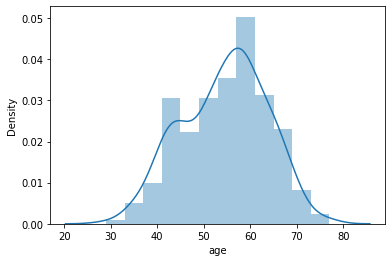

In [96]:
sns.distplot(heart.age)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


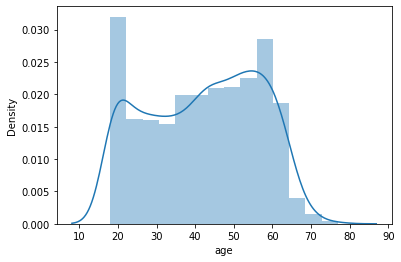

In [97]:
sns.distplot(df_all.age)

**7. What effects did the combination of the 2 data frames have on the age distribution? (Interpret your observation in a markdown cell.)**

The heart dataset had a normal distribution for age.

**8. Isolate all the numerical column names into a list named ‘numerical_continuous’. Visually identify if there is presence of any outliers in the columns and resolve them using a zscore test and a pvalue threshold of your choosing.**

In [101]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1639 entries, 0 to 1640
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1639 non-null   int64  
 1   sex            1639 non-null   int64  
 2   bmi            1337 non-null   float64
 3   children       1337 non-null   float64
 4   smoker         1337 non-null   object 
 5   region         1337 non-null   object 
 6   charges        1337 non-null   float64
 7   cp             302 non-null    float64
 8   trestbps       302 non-null    float64
 9   chol           302 non-null    float64
 10  fbs            302 non-null    float64
 11  restecg        302 non-null    float64
 12  thalach        302 non-null    float64
 13  exang          302 non-null    float64
 14  oldpeak        302 non-null    float64
 15  slope          302 non-null    float64
 16  ca             302 non-null    float64
 17  thal           302 non-null    float64
 18  heart di

In [102]:
numerical_continuous=df_all.select_dtypes(['float'])

In [103]:
numerical_continuous.head()


,bmi,children,charges,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,27.900,0.0,16884.92400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.770,1.0,1725.55230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.000,3.0,4449.46200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.705,0.0,21984.47061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.880,0.0,3866.85520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


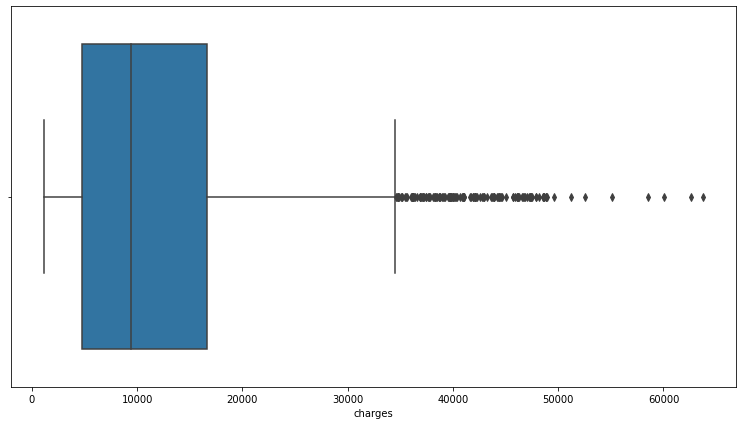

In [105]:
plt.figure(figsize=(13,7))
sns.boxplot(numerical_continuous.charges)

In [116]:
def remove_outlier(col):
  q25=col.quantile(0.25)
  q75=col.quantile(0.75)
  iqr=q75-q25
  cutoff=iqr*0.3
  lower=q25-cutoff
  upper=q75+cutoff
  return lower, upper
  lower, upper =remove_outlier(numerical_continuous.charges)
  numerical_continuous=numerical_continuous.loc[(numerical_continuous.charges>lower) & (numerical_continuous.charges<upper)]

**Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


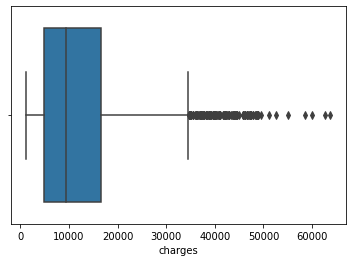

In [117]:
  sns.boxplot(numerical_continuous.charges)

**10. Assuming the column ‘charges’ is your target for your regression analysis, feature select the best ‘numerical_continuous’ columns using the backward elimination method.**

In [118]:
X=numerical_continuous.drop(['charges'],axis=1)
X.head()


,bmi,children,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,27.900,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,33.770,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,33.000,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.705,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.880,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
Y=numerical_continuous.charges
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [120]:
numerical_continuous.mean()

bmi                 30.663452
children             1.095737
charges          13279.121487
cp                   0.963576
trestbps           131.602649
chol               246.500000
fbs                  0.149007
restecg              0.526490
thalach            149.569536
exang                0.327815
oldpeak              1.043046
slope                1.397351
ca                   0.718543
thal                 2.314570
heart disease        0.543046
dtype: float64

In [121]:
numerical_continuous.fillna(numerical_continuous.mean())

,bmi,children,charges,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,27.900000,0.000000,16884.924000,0.963576,131.602649,246.5,0.149007,0.52649,149.569536,0.327815,1.043046,1.397351,0.718543,2.31457,0.543046
1,33.770000,1.000000,1725.552300,0.963576,131.602649,246.5,0.149007,0.52649,149.569536,0.327815,1.043046,1.397351,0.718543,2.31457,0.543046
2,33.000000,3.000000,4449.462000,0.963576,131.602649,246.5,0.149007,0.52649,149.569536,0.327815,1.043046,1.397351,0.718543,2.31457,0.543046
3,22.705000,0.000000,21984.470610,0.963576,131.602649,246.5,0.149007,0.52649,149.569536,0.327815,1.043046,1.397351,0.718543,2.31457,0.543046
4,28.880000,0.000000,3866.855200,0.963576,131.602649,246.5,0.149007,0.52649,149.569536,0.327815,1.043046,1.397351,0.718543,2.31457,0.543046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,30.663452,1.095737,13279.121487,0.000000,140.000000,241.0,0.000000,1.00000,123.000000,1.000000,0.200000,1.000000,0.000000,3.00000,0.000000
1637,30.663452,1.095737,13279.121487,3.000000,110.000000,264.0,0.000000,1.00000,132.000000,0.000000,1.200000,1.000000,0.000000,3.00000,0.000000
1638,30.663452,1.095737,13279.121487,0.000000,144.000000,193.0,1.000000,1.00000,141.000000,0.000000,3.400000,1.000000,2.000000,3.00000,0.000000
1639,30.663452,1.095737,13279.121487,0.000000,130.000000,131.0,0.000000,1.00000,115.000000,1.000000,1.200000,1.000000,1.000000,3.00000,0.000000


**11. Create a list containing all the numerical discrete column names called ‘numerical_discrete’.**

In [122]:
numerical_discrete=df_all.select_dtypes(['int'])

In [123]:
numerical_discrete.head()

,age,sex
0,19,0
1,18,1
2,28,1
3,33,1
4,32,1


**12. Isolate all the categorical column names into a list named ‘categorical’. Using ColumnTransformer, LableEncode the columns.**

In [124]:
categorical=df_all.select_dtypes(['object'])

In [125]:
categorical.head()

,smoker,region
0,yes,southwest
1,no,southeast
2,no,southeast
3,no,northwest
4,no,northwest


**13. Assuming the column ‘heart_disease’ is the target for your classification analysis, run a chi contingency test to identify the best categorical and numerical_discrete features to proceed with the analysis.**

**14. Generate 2 heat map visualizations, one exclusively for the correlation among the resulting numerical continuous columns and the other for the resulting categorical columns.**

In [126]:
numerical_continuous.corr()

,bmi,children,charges,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
bmi,1.000000,0.012755,0.198401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
children,0.012755,1.000000,0.067389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,0.198401,0.067389,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,NaN,NaN,NaN,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,NaN,NaN,NaN,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,NaN,NaN,NaN,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,NaN,NaN,NaN,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,NaN,NaN,NaN,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,NaN,NaN,NaN,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,NaN,NaN,NaN,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601


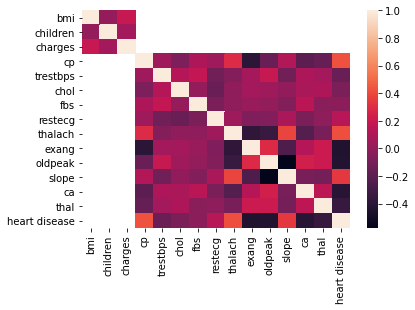

In [127]:
sns.heatmap(numerical_continuous.corr())